In [7]:
import nengo
import nengo.spa as spa
from nengo.spa import Vocabulary
import numpy as np

In [8]:
rng = np.random.RandomState(10)
dim = 32

vocab = Vocabulary(dimensions=dim, rng=rng, max_similarity=0.02, unitary=True)
#zero = spa.SemanticPointer(dim)

incr = vocab.parse("INCREMENT")


zero = vocab.parse("ZERO")
vocab.add("ONE", vocab.parse("ZERO*INCREMENT"))
vocab.add("TWO", vocab.parse("ONE*INCREMENT"))
vocab.add("THREE", vocab.parse("TWO*INCREMENT"))
vocab.add("FOUR", vocab.parse("THREE*INCREMENT"))
vocab.add("FIVE", vocab.parse("FOUR*INCREMENT"))
vocab.add("SIX", vocab.parse("FIVE*INCREMENT"))
vocab.add("SEVEN", vocab.parse("SIX*INCREMENT"))
vocab.add("EIGHT", vocab.parse("SEVEN*INCREMENT"))
vocab.add("NINE", vocab.parse("EIGHT*INCREMENT"))
vocab.add("TEN", vocab.parse("NINE*INCREMENT"))
vocab.add("ELEVEN", vocab.parse("TEN*INCREMENT"))
vocab.add("TWELVE", vocab.parse("ELEVEN*INCREMENT"))


one = vocab.parse("ONE")
two = vocab.parse("TWO")
three = vocab.parse("THREE")
four = vocab.parse("FOUR")
five = vocab.parse("FIVE")
six = vocab.parse("SIX")
seven = vocab.parse("SEVEN")
eight = vocab.parse("EIGHT")
nine = vocab.parse("EIGHT*INCREMENT")
ten = vocab.parse("NINE*INCREMENT")

#nine = vocab.parse("NUMBER*NINE+PARITY*EVEN")
#ten = vocab.parse("NUMBER*TEN+PARITY*EVEN")

In [9]:
# Compute the transformation and convert it into a SP object
T = (~zero*one + ~one*two + ~two*three + ~three*four + ~four*five + ~five*six + ~six*seven + ~seven*eight).v / 8
T = spa.SemanticPointer(T)
print (type(T))

# As expected, the transformation vector is very similar to the increment vector
print (T.v)
print (incr.v)
print (np.dot(incr.v, T.v))   # dot product ~ 1

<class 'nengo.spa.pointer.SemanticPointer'>
[ 2.25710232e-01  1.30008703e-01 -1.93246707e-01  9.10827210e-02
  8.67250804e-02 -2.26873939e-01  1.70518601e-01 -2.15368764e-02
 -7.19184676e-03 -1.29578425e-01  2.90004606e-02  1.90328357e-01
 -1.68342579e-01  1.06463640e-01  2.06235027e-02  4.17347532e-02
 -1.75896317e-01  5.29417764e-02  1.82940339e-01 -7.89623199e-02
 -3.39696063e-01 -2.10148710e-01  3.86644580e-02  4.29808131e-01
  1.64385832e-01  2.80548570e-01 -4.21128817e-04  3.42498815e-01
 -1.28211076e-01  1.32382589e-01  9.44372116e-02 -1.30697785e-01]
[ 2.25710232e-01  1.30008703e-01 -1.93246707e-01  9.10827210e-02
  8.67250804e-02 -2.26873939e-01  1.70518601e-01 -2.15368764e-02
 -7.19184676e-03 -1.29578425e-01  2.90004606e-02  1.90328357e-01
 -1.68342579e-01  1.06463640e-01  2.06235027e-02  4.17347532e-02
 -1.75896317e-01  5.29417764e-02  1.82940339e-01 -7.89623199e-02
 -3.39696063e-01 -2.10148710e-01  3.86644580e-02  4.29808131e-01
  1.64385832e-01  2.80548570e-01 -4.21128817e

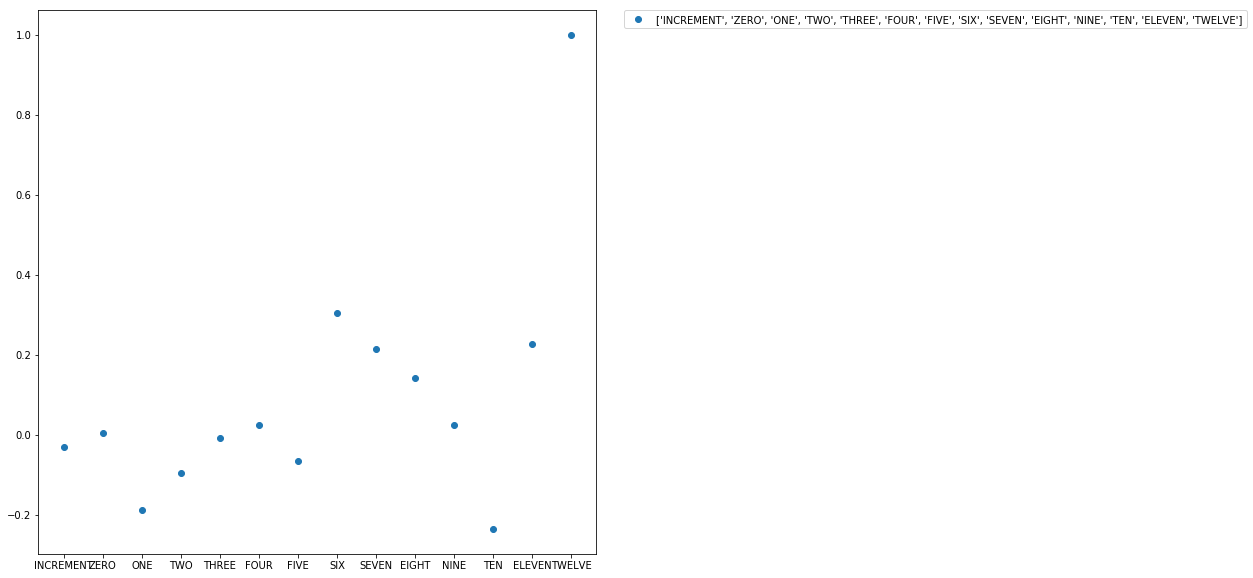

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline


test = (eight * T*T*T*T).v

similarity = []
for sp_name in vocab.keys:
    vec = vocab.parse(sp_name).v
    similarity.append(np.dot(test, vec))
 
   
#similarity = vocab.dot(test)    # compute dot product with each vector in the vocab
  
plt.figure(figsize = (10,10))    
plt.plot(vocab.keys, similarity, 'o', label=vocab.keys)   
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

Succ1, succ2, succ3 all work here. 